In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urdu-sa-test/imdb_urdu_reviews_test.csv
/kaggle/input/cleaned/cleaned.csv
/kaggle/input/urdu-stopwords-list/stopwords-ur.json.txt
/kaggle/input/urdu-stopwords-list/LICENSE.txt
/kaggle/input/urdu-stopwords-list/stopwords-ur.txt
/kaggle/input/urdu-sa-train/imdb_urdu_reviews_train.csv


**Q-1: Data Loading and Preliminary Analysis (10 Marks)**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


a. Load the Urdu movie reviews dataset into a Pandas DataFrame.

In [69]:
#a. a. Show the first few rows of the dataset.

# Load the train and test datasets
train_df = pd.read_csv('/kaggle/input/urdu-sa-train/imdb_urdu_reviews_train.csv')
test_df = pd.read_csv('/kaggle/input/urdu-sa-test/imdb_urdu_reviews_test.csv')

# Show the first few rows of the train dataset
train_df.head()

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive


In [8]:
#print test_df also
test_df.head()

,review,sentiment
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,negative
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,negative
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,negative
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...,positive
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...,positive


In [70]:
# Combine train and test datasets
# I am combining the dataset to avoid an confussion later

combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df.head()

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive


In [10]:
#b. b. Display the column names and their data types.

# Display column names and data types

combined_df.dtypes

review       object
sentiment    object
dtype: object

b. Perform a preliminary analysis:

In [11]:
#a. a. Check for null values and handle any missing data if present. Explain your approach.

combined_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
# b. Identify and analyze the distribution of the classes (positive, negative, etc.) in the dataset. Are they balanced?

# Check the distribution of labels in the dataset
combined_df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

The Dataset is completely balanced

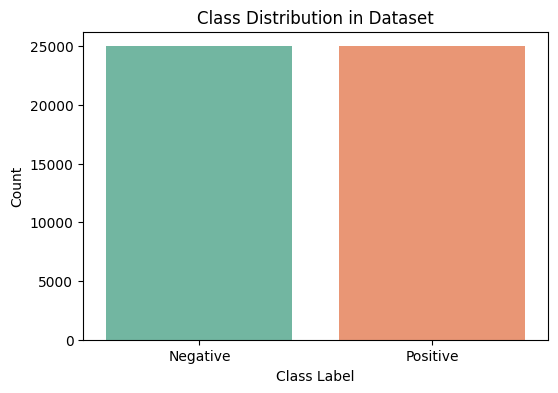

In [13]:
# Plot for the train dataset

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=combined_df, palette='Set2')
plt.title('Class Distribution in Dataset')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

**Q-2: Data Visualization (10 Marks)**

a. Generate and display a word cloud from the Urdu movie reviews text to visualize commonly 



used words

**Installing arabic-reshaper liberary for generating urdu wordcloud**

In [27]:
!pip install arabic-reshaper python-bidi

In [14]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=b6cb30fc360a75028017fcd82c4a1d618541e2bd97b8763ab9f8ac1f897e05e2
  Stored in directory: c:\users\pc vision\appdata\local\pip\cache\wheels\46\78\0e\8e5e2b500f83a682c8d7e7ce820638cf99faa894a662f71cf0
Successfully built wget


**Downloading NotoNaskhArabic font from Github for generating wordcloud**

In [26]:
!wget -O /tmp/NotoNaskhArabic-Regular.ttf https://github.com/frappe/fonts/raw/master/usr_share_fonts/noto/NotoNaskhArabic-Regular.ttf

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-11-11 12:43:33--  https://github.com/frappe/fonts/raw/master/usr_share_fonts/noto/NotoNaskhArabic-Regular.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/frappe/fonts/master/usr_share_fonts/noto/NotoNaskhArabic-Regular.ttf [following]
--2024-11-11 12:43:33--  https://raw.githubusercontent.com/frappe/fonts/master/usr_share_fonts/noto/NotoNaskhArabic-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134028 (131K) [application/octet-stream]
Saving to: '/tmp/NotoNaskhArabic-Regular.ttf'

/tmp/NotoNaskhArabi 100%[===================>] 130.89K  --.-KB/s    in 0.009s  

2024-11-11 

Removing stop words for better understanding

**Fetching the list of Urdu stopwords from Github repo**

In [16]:
import requests

# URL of the Urdu stop words text file
url = "https://raw.githubusercontent.com/RivaMalik/MediumWork/b48524de01d2190f64624a9a9d4cbd9fe657cffa/NLP/stop_words.txt"

# Fetch the content of the file
response = requests.get(url)
stop_words = response.text.splitlines()

# Print the first few stop words to verify
print("First few stop words from the list:")
print(stop_words[:10])  # Display the first 10 stop words as a sample

First few stop words from the list:
['آ', 'آؤ', 'آو', 'آئی', 'آئیں', 'آئے', 'آج', 'آجاؤ', 'آجائیں', 'آجائیے']


In [17]:
# Append "ہے" to the list of stop words as i tried i was't present in the list
stop_words.append("ہے")

**Removing StopWords from combined dataset to generate meaningfull wordcloud**

In [20]:
# Function to remove stop words from

def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

# Apply stop word removal to the combined reviews
combined_df['review'] = combined_df['review'].apply(lambda x: remove_stopwords(str(x), stop_words))

In [21]:
# Display the sample after stop word removal

sample_review_after = combined_df['review'].iloc[0]

print("\nAfter Stop Word Removal:\n", sample_review_after)


After Stop Word Removal:
 80 دہائی وسط ایک کیبل گائیڈ (اسکائینجر ہنٹ پہلو اپیل تھی) علامت مبنی ایک نوعمر حیثیت ٹیپ ، فلم معلومات توقعات تھیں۔ کتنی خوشگوار حیرت دیکھا! ایک ایسی تفریحی فلم یاد تھا۔ سوچا تصور اچھی نافذ ، مختلف گروہوں مابین بے ضرر مسابقت لطف اٹھایا ، لگتا مقتول شکار کافی ہوشیار تھا۔ ایسا لگتا لوگوں فلموں توقعات وابستہ ہیں۔ فلموں ایک بھاری "پیغام" شاندار اداکاری ، پروڈکشن قدریں ، خصوصی اثرات مرتب گے۔ بعض اوقات فلمیں تفریح ​​اور تفریح ​​کے ہوتی سطحوں کامیاب ہوتی ہے۔ جڑواں اداکار اداکاروں تبصرے پڑھ اچھا لگا۔ فلم برسوں ، سمجھتا اتنا گرم جوش خروش ردعمل ظاہر کروں نوعمری تھا۔ ٹائپ کرتا ، پنیر موزوں تھیم گانا ٹکڑوں سر چلا ہیں: "جب آدھی رات جنون ملنا شروع ہوجاتا ... فرق پڑتا ، فرق پڑتا ہیں۔ ..! "


In [22]:
combined_df.head()

,review,sentiment
0,80 دہائی وسط ایک کیبل گائیڈ (اسکائینجر ہنٹ پہل...,positive
1,چونکہ 80 دہائی انسپکٹر گیجٹ کارٹون پسند ، لہذا...,negative
2,ایک ایسے معاشرے حالت تعجب کرتا ایک ایسے والد پ...,positive
3,مفید البرٹ پیون ایک ردی ٹوکری گریڈ زیڈ جلدی۔ ٹ...,negative
4,کولمبو جس ہدایتکاری کیریئر ابتدائی وقت اسٹیون ...,positive


In [23]:
combined_df.iloc[3]

review       مفید البرٹ پیون ایک ردی ٹوکری گریڈ زیڈ جلدی۔ ٹ...
sentiment                                             negative
Name: 3, dtype: object

**Generating WordCloud**

In [18]:
from bidi.algorithm import get_display
from arabic_reshaper import ArabicReshaper

# Concatenate all reviews of train dataset into a single text
text = ' '.join(train_df['review'].astype(str))

# Reshape the text for proper Urdu display
configuration = {"language": "Urdu"}
reshaper = ArabicReshaper(configuration=configuration)
reshaped_text = reshaper.reshape(text)
display_text = get_display(reshaped_text)

# Configure the WordCloud

wc = WordCloud(
    font_path='/tmp/NotoNaskhArabic-Regular.ttf',  # Update with the correct font path
    background_color="white",
    width=800,
    height=400,
    repeat=True
)

# Generate the word cloud
wc.generate(display_text)

**Display and save the word cloud**

this wordcloud is generated from the review column which is not pre-processed
thats why it has stop words and I guess the method of importing stopwords list from github didn't work for me let's see in the data pre processing step

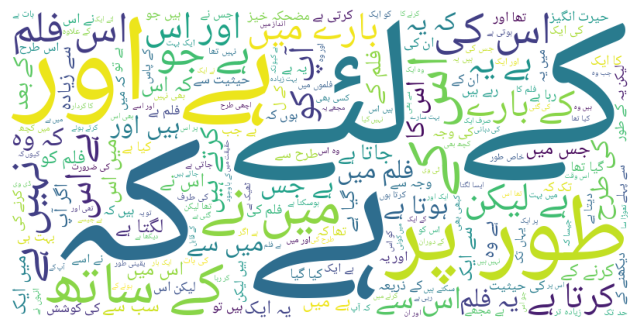

In [19]:
# Display and save the word cloud

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc)
plt.savefig("/kaggle/working/urdu_wordcloud.", format="png")  # Save as PNG
plt.show()

This wordcloud has all just Urdu stopwords so I will perfrom it again on processed data for better understanding and will describe the insights

This is a new liberary for Urdu text pre pre processing and NLP task It was released in April 2024

In [6]:
!pip install lughaatNLP #downloding for removing stopwords and limmitization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 MB 8.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 53.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.5 MB/s eta 0:00:00:00:01


**Q-3: Data Preprocessing (20 Marks)**


before attemping Question number three I want to clarify that first I will apply text normalization then removing the stop words, after that I will generate wordcloud again on this processed data and after that I will perform stemming and at the end I will perform text tokenization. because I faced problems while creating wordcloud on tokenized text so I am doing it at the end

**a. Text Normalization: Remove punctuation, special characters, and numbers.**


In [7]:
# For Normalization, Lemmetization/Stemming, Stopwords Removing and Spell CEking
from LughaatNLP import NER_Urdu
from LughaatNLP import POS_urdu
from LughaatNLP import LughaatNLP
urdu_text_processing = LughaatNLP()

In [71]:
import re
# Step 1: Custom Normalization (Removing punctuation, special characters, and numbers)
def normalize_text(text):
    # Remove punctuation, special characters, and numbers (in English and Urdu)
    normalized_text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation and special characters
    normalized_text = re.sub(r'[0-9۰-۹]', '', normalized_text)  # Removes numbers
    return normalized_text

# Apply normalization and print before and after for one sample review
print("Original Text (before normalization):", combined_df['review'][0])
combined_df['Processed_Review'] = combined_df['review'].apply(normalize_text)
print("Text after normalization:", combined_df['Processed_Review'][0])

Original Text (before normalization): میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائیڈ (اسکائینجر ہنٹ پہلو نے مجھ سے اپیل کی تھی) کی علامت پر مبنی ایک نوعمر کی حیثیت سے ٹیپ کیا ، اس فلم کی کوئی معلومات یا توقعات نہیں تھیں۔ کتنی خوشگوار حیرت ہے جب میں نے اسے دیکھا! یہ ایک ایسی تفریحی فلم تھی اور مجھے یاد ہے کہ اسے بار بار دیکھا جاتا تھا۔ میں نے سوچا کہ یہ تصور اچھی طرح سے نافذ کیا گیا ہے ، میں نے مختلف گروہوں کے مابین بے ضرر مسابقت کا لطف اٹھایا ، اور مجھے لگتا ہے کہ مقتول کا شکار خود ہی کافی ہوشیار تھا۔ کبھی کبھی ایسا لگتا ہے کہ لوگوں کو فلموں سے بہت زیادہ توقعات وابستہ ہیں۔ تمام فلموں میں ایک بھاری "پیغام" یا شاندار اداکاری ، پروڈکشن کی قدریں ، یا خصوصی اثرات مرتب نہیں ہوں گے۔ بعض اوقات فلمیں صرف تفریح ​​اور تفریح ​​کے لئے ہوتی ہیں اور یہ دونوں سطحوں پر کامیاب ہوتی ہے۔ جڑواں اداکار اداکاروں کے تبصرے پڑھ کر بہت اچھا لگا۔ میں نے یہ فلم برسوں میں نہیں دیکھی ، لیکن اگر میں یہ سمجھتا تھا کہ میں اس کے بارے میں اتنا ہی گرم اور جوش و خروش سے اپنا ردعمل ظاہر کروں گا جیسے میں نے نوعمری کی طرح ک

**c. Stopword Removal: Remove Urdu stopwords to improve classification accuracy.**

In [72]:
def remove_stopwords(text):
    filtered_text = urdu_text_processing.remove_stopwords(text)
    return filtered_text

# Apply stopword removal and print before and after for one sample review
print("\nText before stopword removal:", combined_df['Processed_Review'][0])
combined_df['Processed_Review'] = combined_df['Processed_Review'].apply(remove_stopwords)
print("Text after stopword removal:", combined_df['Processed_Review'][0])


Text before stopword removal: میں نے اسے  کی دہائی کے وسط میں ایک کیبل گائیڈ اسکائینجر ہنٹ پہلو نے مجھ سے اپیل کی تھی کی علامت پر مبنی ایک نوعمر کی حیثیت سے ٹیپ کیا  اس فلم کی کوئی معلومات یا توقعات نہیں تھیں کتنی خوشگوار حیرت ہے جب میں نے اسے دیکھا یہ ایک ایسی تفریحی فلم تھی اور مجھے یاد ہے کہ اسے بار بار دیکھا جاتا تھا میں نے سوچا کہ یہ تصور اچھی طرح سے نافذ کیا گیا ہے  میں نے مختلف گروہوں کے مابین بے ضرر مسابقت کا لطف اٹھایا  اور مجھے لگتا ہے کہ مقتول کا شکار خود ہی کافی ہوشیار تھا کبھی کبھی ایسا لگتا ہے کہ لوگوں کو فلموں سے بہت زیادہ توقعات وابستہ ہیں تمام فلموں میں ایک بھاری پیغام یا شاندار اداکاری  پروڈکشن کی قدریں  یا خصوصی اثرات مرتب نہیں ہوں گے بعض اوقات فلمیں صرف تفریح اور تفریح کے لئے ہوتی ہیں اور یہ دونوں سطحوں پر کامیاب ہوتی ہے جڑواں اداکار اداکاروں کے تبصرے پڑھ کر بہت اچھا لگا میں نے یہ فلم برسوں میں نہیں دیکھی  لیکن اگر میں یہ سمجھتا تھا کہ میں اس کے بارے میں اتنا ہی گرم اور جوش و خروش سے اپنا ردعمل ظاہر کروں گا جیسے میں نے نوعمری کی طرح کیا تھا یہاں تک کہ جب میں یہ ٹائ

**Generatin wordcloud again after removing stopwords and normalizing text**

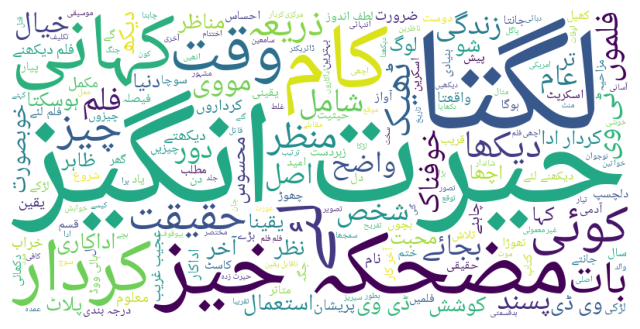

In [73]:
from bidi.algorithm import get_display
from arabic_reshaper import ArabicReshaper

# Concatenate all reviews of cleaned_df dataset into a single text
text = ' '.join(combined_df['Processed_Review'].astype(str))

# Reshape the text for proper Urdu display
configuration = {"language": "Urdu"}
reshaper = ArabicReshaper(configuration=configuration)
reshaped_text = reshaper.reshape(text)
display_text = get_display(reshaped_text)

# Configure the WordCloud

wc = WordCloud(
    font_path='/tmp/NotoNaskhArabic-Regular.ttf',  # font path
    background_color="white",
    width=800,
    height=400,
    repeat=True
)

# Generate the word cloud
wc.generate(display_text)
# Display and save the word cloud

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc)
plt.savefig("/kaggle/working/urdu_wordcloud.", format="png")  # Save as PNG
plt.show()

b. Based on the word cloud, describe any key insights about the most frequently appearing 
words. Do you notice any themes or patterns?

The word cloud primarily focuses on film reviews. The most frequent word is "فلم," which is expected given the dataset's focus. Other prominent words like "خوبصورت," "دلچسپ,","کام" ,"کردار" ,"کہانی
" and "مضحکہ خیز" indicate that the reviews discuss films that are considered beautiful, interesting, and funny. There are also words related to the technical aspects of filmmaking, such as "اداکاری," "ہدایتکاری," and "فلم سازی," suggesting that the reviews delve into the performance, direction, and overall filmmaking process.

**d. Lemmatization**


In [74]:
#Lemmatization
def lemmatize_text(text):
    lemmatized_text = urdu_text_processing.lemmatize_sentence(text)
    return lemmatized_text

# Apply lemmatization and print before and after for one sample review
print("\nText before lemmatization:", combined_df['Processed_Review'][0])
combined_df['Processed_Review'] = combined_df['Processed_Review'].apply(lemmatize_text)
print("Text after lemmatization:", combined_df['Processed_Review'][0])


Text before lemmatization: دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل علامت مبنی نوعمر حیثیت ٹیپ فلم کوئی معلومات توقعات کتنی خوشگوار حیرت دیکھا تفریحی فلم یاد دیکھا سوچا تصور اچھی نافذ گروہوں مابین بے ضرر مسابقت لطف اٹھایا لگتا مقتول شکار کافی ہوشیار لگتا فلموں توقعات وابستہ فلموں بھاری پیغام شاندار اداکاری پروڈکشن قدریں خصوصی اثرات مرتب گے اوقات فلمیں تفریح تفریح لئے سطحوں کامیاب جڑواں اداکار اداکاروں تبصرے پڑھ اچھا فلم برسوں سمجھتا گرم جوش خروش ردعمل ظاہر کروں نوعمری ٹائپ پنیر موزوں تھیم گانا ٹکڑوں آدھی رات جنون ملنا شروع ہوجاتا کوئی فرق کہتے کوئی فرق
Text after lemmatization: دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلا اپیل علامت مبنی نوعمر حیثیت ٹیپ فلم کوئی معلومات توقعات کتنا خوشگوار حیرت دیکھْنا تفریحی فلم یاد دیکھْنا سوچنا تصور اچھی نافذ گروہوں مابین بد ضرر مسابقت لطف اٹھنا لگنا مقتول شکار کافی ہوشیار لگنا فلم توقعات وابستہ فلم بھاری پیغام شاندار اداکاری پروڈکشن قدر خصوصی اثر مرتب گے اوقات فلم تفریح تفریح لئے سطحوں کامیاب جڑواں اداکار اداکارہ تبصرہ پڑھنا اچھا فلم برس سمجھ گرم ج

d. Stemming or Lemmatization (if applicable): Briefly describe what stemming or 
lemmatization is and how it might help in the context of Urdu text processing

**Stemming and Lemmatization**

Stemming and lemmatization are two NLP techniques that reduce words to their base or root form.

Stemming: Trimming words at both ends for the purpose of arriving at a base form, usually by removing suffixes. For example, "running," "runner," and "ran" all may be reduced to "run." Stemming is generally more aggressive and does not always yield a valid word.

This is a further refinement of stemming. Lemmatization reduces words to their base or dictionary form while taking into consideration the context and the part of speech. For instance, "better" will be lemmatized into "good", and "running" will be lemmatized into "run." This requires a greater linguistic understanding usually using a dictionary or vocabulary.

**Application to Urdu Text Processing**

Stemming and lemmatization are most useful in the process of Urdu text processing for several reasons:

**Normalization:** As is the case with all the languages, Urdu has inflections and derivations in different forms. So, normalization is done by stemming and lemmatization for further text consistency analysis. For example, taking a base in the form of the base for verb variants, what might seem to be an otherwise differently formed variant could be transferred; this would be easier on both accounts of frequency and sentiment analysis.

**Improved Search and Retrieval:** In general, for Urdu text preprocessing for search or retrieval applications, like search engines or information retrieval systems, stemming and lemmatization can be helpful in returning relevant documents for a user's search. As users usually enter the same search in different word forms, stemming reduces words to base forms, thus adding to chances that relevant results will get retrieved.

For instance, in a text classification or sentiment analysis, stemming of words improves the performance of the machine learning model since it minimizes the dimensionality of the feature space; otherwise, the models can put much more emphasis on the actual meaning of words rather than variations of the same word.

**Handling Morphological Richness:** Urdu is a morphologically rich language where words, depending upon their various forms for tenses, genders, numbers, etc., have variation. Stemming and lemmatization handle such richness by making words deflate to their basic forms; then it is easier to analyze and process the text.


**b. Tokenization: Split the Urdu text into individual words.**


**Tokenization - Split the Urdu text into individual words**

In [75]:
combined_df['Processed_Review'] = combined_df['Processed_Review'].apply(urdu_text_processing.urdu_tokenize)
print("\nAfter Tokenization:")
print("Tokenized Text:", combined_df['Processed_Review'].iloc[0])


After Tokenization:
Tokenized Text: ['دہائی', 'وسط', 'کیبل', 'گائیڈ', 'اسکائینجر', 'ہنٹ', 'پہلا', 'اپیل', 'علامت', 'مبنی', 'نوعمر', 'حیثیت', 'ٹیپ', 'فلم', 'کوئی', 'معلومات', 'توقعات', 'کتنا', 'خوشگوار', 'حیرت', 'دیکھْنا', 'تفریحی', 'فلم', 'یاد', 'دیکھْنا', 'سوچنا', 'تصور', 'اچھی', 'نافذ', 'گروہوں', 'مابین', 'بد', 'ضرر', 'مسابقت', 'لطف', 'اٹھنا', 'لگنا', 'مقتول', 'شکار', 'کافی', 'ہوشیار', 'لگنا', 'فلم', 'توقعات', 'وابستہ', 'فلم', 'بھاری', 'پیغام', 'شاندار', 'اداکاری', 'پروڈکشن', 'قدر', 'خصوصی', 'اثر', 'مرتب', 'گے', 'اوقات', 'فلم', 'تفریح', 'تفریح', 'لئے', 'سطحوں', 'کامیاب', 'جڑواں', 'اداکار', 'اداکارہ', 'تبصرہ', 'پڑھنا', 'اچھا', 'فلم', 'برس', 'سمجھ', 'گرم', 'جوش', 'خروش', 'ردعمل', 'ظاہر', 'کرہ', 'نوعمری', 'ٹائپ', 'پنیر', 'موزہ', 'تھیم', 'گانا', 'ٹکڑا', 'آدھی', 'رات', 'جنون', 'ملنا', 'شروع', 'ہوجانا', 'کوئی', 'فرق', 'کہنا', 'کوئی', 'فرق']


I saved the cleaned dataset and then import it now I will work on this dataset

In [13]:
# Save preprocessed data to a new CSV file
combined_df.to_csv('/kaggle/working/cleaned.csv', index=False)

In [76]:
cleaned_df = pd.read_csv('/kaggle/input/cleaned/cleaned.csv')
cleaned_df.head()

,review,sentiment,Processed_Review
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive,"['دہائی', 'وسط', 'کیبل', 'گائیڈ', 'اسکائینجر',..."
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative,"['دہائی', 'انسپکٹر', 'گیجٹ', 'کارٹون', 'پسند',..."
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive,"['معاشرہ', 'حالت', 'تعجب', 'والد', 'پیدا', 'ال..."
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative,"['مفید', 'البرٹ', 'پیون', 'ردی', 'ٹوکری', 'گری..."
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive,"['کولمبو', 'ہدایتکاری', 'کیریئر', 'ابتدائی', '..."


In [45]:
# Display the first preprocessed review for inspection
print("Preprocessed Review (First entry):\n", cleaned_df['Processed_Review'].iloc[1])

Preprocessed Review (First entry):
 ['دہائی', 'انسپکٹر', 'گیجٹ', 'کارٹون', 'پسند', 'فلم', 'دیکھنا', 'پیسہ', 'ضائع', 'پلاٹ', 'پتلا', 'فلم', 'دن', 'دلچسپی', 'سکنا', 'خوش', 'ختم', 'ہوچکا', 'انسپکٹر', 'گیجٹ', 'دیکھ', 'بجنا', 'کارٹون', 'دیکھ', 'فلم']


In [46]:
print(cleaned_df['review'].iloc[1])

چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹون کو پسند کیا تھا ، لہذا میں اس فلم کو دیکھنے گیا۔ میں نے اپنا پیسہ ضائع کیا۔ پلاٹ بہت پتلا تھا۔ نیز ، فلم مجھے زیادہ دن دلچسپی نہیں بنا سکی۔ مجھے خوشی ہوئی کہ یہ ختم ہوچکا ہے۔ اگر آپ انسپکٹر گیجٹ دیکھنا چاہتے ہیں تو ، اس کے بجائے کارٹون دیکھیں۔ یہ فلم سے کہیں بہتر تھا۔


Conerting the Positive sentiment to "1" and the Negative to "0" through LabelEncoder

In [77]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Sentiment column to convert 'positive' to 1 and 'negative' to 0
cleaned_df['sentiment'] = label_encoder.fit_transform(cleaned_df['sentiment'])

# Verify the first few rows
cleaned_df.head()

,review,sentiment,Processed_Review
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,1,"['دہائی', 'وسط', 'کیبل', 'گائیڈ', 'اسکائینجر',..."
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,0,"['دہائی', 'انسپکٹر', 'گیجٹ', 'کارٹون', 'پسند',..."
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,1,"['معاشرہ', 'حالت', 'تعجب', 'والد', 'پیدا', 'ال..."
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,0,"['مفید', 'البرٹ', 'پیون', 'ردی', 'ٹوکری', 'گری..."
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,1,"['کولمبو', 'ہدایتکاری', 'کیریئر', 'ابتدائی', '..."


**Spliting the data into train and test**

In [81]:
from sklearn.model_selection import train_test_split
# Split the combined data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(cleaned_df['Processed_Review'], cleaned_df['sentiment'], test_size=0.2, random_state=42)

In [82]:
X_train.iloc[:5]

39087    ['ہالی', 'ووڈ', 'میموڈو', 'کنگ', 'لئے', 'لڑائی...
30893    ['شان', 'پین', 'مداح', 'برعکس', 'جرمن', 'ساتھی...
45278    ['واضح', 'فلم', 'برطانوی', 'مقبول', 'موسیقی', ...
16398    ['پچھلا', 'شخص', 'تبصرہ', 'جواب', 'چیز', 'چھون...
13653    ['ہیپی', 'ایور', 'لطف', 'اندوز', 'ٹیری', 'جون'...
Name: Processed_Review, dtype: object

In [83]:
y_train.iloc[:5]

39087    1
30893    1
45278    0
16398    1
13653    1
Name: sentiment, dtype: int64

before string Question 4 Ifaced several challenges of memory as it take a lot of memory and every time when I tried to run trigrams my laptop gets hanged every time I tried collab and kaggle as well there were same issue of the memory thats why I reduce max_features and batch_size.  

**Q-4: Feature Extraction Techniques (20 Marks)**

In [59]:
# Parameters for efficient processing
max_features = 20000  # Limiting vocabulary size for memory efficiency
batch_size = 5000  # Number of rows to process in each batch

def extract_ngram_features(X_train, ngram_range):
    """
    Extract TF-IDF features for the specified n-gram range with batch processing.
    """
    # Initialize TF-IDF vectorizer and fit on the entire dataset to ensure consistent vocabulary
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range, min_df=2, max_df=0.95)
    tfidf_vectorizer.fit(X_train)
    
    # Process data in batches
    tfidf_matrices = []
    for i in range(0, X_train.shape[0], batch_size):
        chunk = X_train[i:i+batch_size]
        tfidf_matrix_chunk = tfidf_vectorizer.transform(chunk)
        tfidf_matrices.append(tfidf_matrix_chunk)

    # Combine all batches into a single sparse matrix
    X_tfidf = vstack(tfidf_matrices)
    return pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

This code releases important words and phrases found in text documents to make features for machine learning models efficiently. It achieves this by breaking down the text into small chunks that are then fed into a processing pipeline while being grouped into batches.

Unigrams capture the single words, capturing the frequencies of a word regarding the text. It is easy from here to identify the most frequent or relevant words.

In [60]:
# 1. Unigrams
print("Unigrams (1-word features):")
unigrams_features = extract_ngram_features(X_train, ngram_range=(1, 1))
print(unigrams_features.head())

Unigrams (1-word features):
   آخر  ؤبڑ  ئول   اؤ  اؤل  اؤٹ  اؤٹر  اؤچ  اؤں   ائ  ...   ۹۲   ۹۳   ۹۴   ۹۵  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    ۹۶   ۹۷   ۹۸   ۹۹  ۹۹۹   १०  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 20000 columns]


In [68]:
unigrams_features.head()

,آخر,ؤبڑ,ئول,اؤ,اؤل,اؤٹ,اؤٹر,اؤچ,اؤں,ائ,...,۹۲,۹۳,۹۴,۹۵,۹۶,۹۷,۹۸,۹۹,۹۹۹,१०
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Bigrams capture two consecutive words, carrying context in showing the way words are related to each other: for instance, "عظیم فلم" or "بری اداکاری".

In [61]:
# 2. Bigrams
print("\nBigrams (2-word features):")
bigrams_features = extract_ngram_features(X_train, ngram_range=(2, 2))
print(bigrams_features.head())


Bigrams (2-word features):
   اؤٹ اؤٹ  اؤٹ اسپیس  اؤٹ فلم  اؤٹ پٹنا  اؤٹ ڈور  اؤٹر اسپیس  ائر لینڈ  \
0      0.0        0.0      0.0       0.0      0.0         0.0       0.0   
1      0.0        0.0      0.0       0.0      0.0         0.0       0.0   
2      0.0        0.0      0.0       0.0      0.0         0.0       0.0   
3      0.0        0.0      0.0       0.0      0.0         0.0       0.0   
4      0.0        0.0      0.0       0.0      0.0         0.0       0.0   

   ائرش لہجہ  ائرن ایگل  ائرن مین  ...  ۸۰ ۸۰  ۸۰ ۹۰  ۸۵ منٹ  ۹۰ دہائی  \
0        0.0        0.0       0.0  ...    0.0    0.0     0.0       0.0   
1        0.0        0.0       0.0  ...    0.0    0.0     0.0       0.0   
2        0.0        0.0       0.0  ...    0.0    0.0     0.0       0.0   
3        0.0        0.0       0.0  ...    0.0    0.0     0.0       0.0   
4        0.0        0.0       0.0  ...    0.0    0.0     0.0       0.0   

   ۹۰ فیصد  ۹۰ منٹ  ۹۵ منٹ  ۹۹ فیصد  ۹۹ ۹۹  १० ۱۰  
0      0.0     0.0     0

In [67]:
bigrams_features.head()

,اؤٹ اؤٹ,اؤٹ اسپیس,اؤٹ فلم,اؤٹ پٹنا,اؤٹ ڈور,اؤٹر اسپیس,ائر لینڈ,ائرش لہجہ,ائرن ایگل,ائرن مین,...,۸۰ ۸۰,۸۰ ۹۰,۸۵ منٹ,۹۰ دہائی,۹۰ فیصد,۹۰ منٹ,۹۵ منٹ,۹۹ فیصد,۹۹ ۹۹,१० ۱۰
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Trigrams A trigram is three consecutive words - with even more context, like short phrases as "اب تک کی بہترین فلم"

In [62]:
# 3. Trigrams
print("\nTrigrams (3-word features):")
trigrams_features = extract_ngram_features(X_train, ngram_range=(3, 3))
print(trigrams_features.head())


Trigrams (3-word features):
   اؤٹ اسپیس منصوبہ  اؤٹ اسپیس پلان  اؤٹ دیکھ نا  ائرش تارکین وطن  \
0               0.0             0.0          0.0              0.0   
1               0.0             0.0          0.0              0.0   
2               0.0             0.0          0.0              0.0   
3               0.0             0.0          0.0              0.0   
4               0.0             0.0          0.0              0.0   

   ائس اسٹیشن زیبرا  ائس کریم شنک  ائس کریم مین  ائی ار اے  ائی ایف ایف  \
0               0.0           0.0           0.0        0.0          0.0   
1               0.0           0.0           0.0        0.0          0.0   
2               0.0           0.0           0.0        0.0          0.0   
3               0.0           0.0           0.0        0.0          0.0   
4               0.0           0.0           0.0        0.0          0.0   

   ائی ایم او  ...  ۹۰ منٹ فلم  ۹۰ منٹ لئے  ۹۰ منٹ لمبا  ۹۰ منٹ لمبی  \
0         0.0  ...         0.0   

In [66]:
trigrams_features.head()

,اؤٹ اسپیس منصوبہ,اؤٹ اسپیس پلان,اؤٹ دیکھ نا,ائرش تارکین وطن,ائس اسٹیشن زیبرا,ائس کریم شنک,ائس کریم مین,ائی ار اے,ائی ایف ایف,ائی ایم او,...,۹۰ منٹ فلم,۹۰ منٹ لئے,۹۰ منٹ لمبا,۹۰ منٹ لمبی,۹۰ منٹ واپس,۹۰ منٹ وقت,۹۰ منٹ چلنا,۹۰ منٹ گزرنا,۹۰ ۹۰ منٹ,१० ۱۰ ۱۰
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Unigrams + Bigrams Both single words and word pairs; allows for the study of individual frequency of words and simple word relationships.

In [63]:
# 4. Unigrams + Bigrams
print("\nUnigrams + Bigrams (1- and 2-word features):")
unigrams_bigrams_features = extract_ngram_features(X_train, ngram_range=(1, 2))
print(unigrams_bigrams_features.head())


Unigrams + Bigrams (1- and 2-word features):
   آخر   اؤ  اؤٹ  اؤٹ اؤٹ  اؤٹ اسپیس  اؤٹ فلم  اؤٹ پٹنا  اؤٹر  اؤں   ائ  ...  \
0  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   
1  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   
2  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   
3  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   
4  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   

   ۹۰ دہائی  ۹۰ منٹ  ۹۱۱   ۹۵   ۹۷   ۹۸   ۹۹  ۹۹ ۹۹   १०  १० ۱۰  
0       0.0     0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  
1       0.0     0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  
2       0.0     0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  
3       0.0     0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  
4       0.0     0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  

[5 rows x 20000 columns]


In [65]:
unigrams_bigrams_features.head()

,آخر,اؤ,اؤٹ,اؤٹ اؤٹ,اؤٹ اسپیس,اؤٹ فلم,اؤٹ پٹنا,اؤٹر,اؤں,ائ,...,۹۰ دہائی,۹۰ منٹ,۹۱۱,۹۵,۹۷,۹۸,۹۹,۹۹ ۹۹,१०,१० ۱۰
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Unigrams + Bigrams + Trigrams includes single words, pairs and triplets, delivering very detailed word-level as well as phrase-level insights.

In [64]:
# 5. Unigrams + Bigrams + Trigrams
print("\nUnigrams + Bigrams + Trigrams (1-, 2-, and 3-word features):")
unigrams_bigrams_trigrams_features = extract_ngram_features(X_train, ngram_range=(1, 3))
print(unigrams_bigrams_trigrams_features.head())


Unigrams + Bigrams + Trigrams (1-, 2-, and 3-word features):
   آخر   اؤ  اؤٹ  اؤٹ اؤٹ  اؤٹ اسپیس  اؤٹ فلم  اؤٹ پٹنا  اؤٹر  اؤں   ائ  ...  \
0  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   
1  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   
2  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   
3  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   
4  0.0  0.0  0.0      0.0        0.0      0.0       0.0   0.0  0.0  0.0  ...   

   ۹۰ دہائی اوائل  ۹۰ منٹ  ۹۱۱   ۹۵   ۹۷   ۹۸   ۹۹   १०  १० ۱۰  १० ۱۰ ۱۰  
0             0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0  
1             0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0  
2             0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0  
3             0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0  
4             0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0  

[5 row

In [69]:
unigrams_bigrams_trigrams_features.head()

,آخر,اؤ,اؤٹ,اؤٹ اؤٹ,اؤٹ اسپیس,اؤٹ فلم,اؤٹ پٹنا,اؤٹر,اؤں,ائ,...,۹۰ دہائی اوائل,۹۰ منٹ,۹۱۱,۹۵,۹۷,۹۸,۹۹,१०,१० ۱۰,१० ۱۰ ۱۰
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


b. Explain each of the above feature extraction methods briefly. What information does each 
capture?

**a. Unigrams (Single Words)**

**Definition:** Unigrams are single words extracted from the text. Each of the unique words in the corpus is treated as a different feature.

**Information Captured:**

**Vocabulary:** Unigrams provide an explicit representation of the vocabulary contained in the text.
Frequency: They capture the frequency of every word that would be perceived to represent how important or relevant a certain term might be in the context of the text.
**Contextual Meaning:** A unigram could sometimes stand for the presence of particular topics or themes, but it certainly doesn't provide an idea of relations with words or the context where these words are used.

**b. Bigrams Two Consecutive Words**

**Definition:** Bigram is defined as two successive words that are extracted from the text; it considers all the distinct pairs as unique features.

**Information Obtained**

**Phrase Context:** Bigrams capture word context as well-happily including common phrases or collocations (for example, "data science," "machine learning").
**Semantic Relations:** These are related to words that collocate and helpful in understanding the meaning of a phrase.
**Improved context awareness:** bigrams could improve tasks such as sentiment analysis, where the meaning of a phrase is different from the sum of meanings of words ("not good" is different from "good").

**c. Trigrams: three adjacent words**

**Definition:** Trigrams are sequences of three successive words taken from the text. All unique triplets are considered as different features.

**Information Extracted:**

**Complex Phrases:** The trigrams are better to capture more complex phrases, and henceforth it provides deeper insights into context and meaning also.
**Contextual nuance:** They help explain the subtlety of language, in that the very addition of one more word can change the meaning of a phrase entirely; for example, "I love programming" versus "I love programming in Python".
**Disambiguation:** Trigrams may contribute to meaning that would otherwise be vague when articulated using unigrams or bigrams and hence add meaning to the text.

**d. Unigrams + Bigrams**

**Definition:** This one combines unigrams and bigrams as features.

**Information Captured:**

**Robust Vocabulary and Context:** This method captures both word and common phrases, which makes it a very complete representation of the text.
**Enhanced Feature Set:** This approach provides a more detailed understanding of the text because it aggregates both the frequency of individual words and the relationships between words.
Such a feature set is more likely effective in all these NLP tasks, ranging from text classification to sentiment analysis, as it utilizes the vocabulary conjugated with the context.

**e.Unigrams + Bigrams + Trigrams**

**Definition:** This approach counts all possible n-grams, like unigrams, bigrams, and trigrams, as features.

**Information Captured:**

**Rich Contextual Representation:** This method takes all three kinds of n-grams into account and, therefore, manages to capture an enormous range of information, from specific words to very complex phrases.
Detailed semantic relationship comprises giving a detail-rich picture of how words and phrases are relating to each other in the document, hence generating a better understanding of the content.
**Versatility in NLP Applications:** This feature set will be mainly useful for more complex NLP tasks such as machine translations, summarization, and more advanced sentiment analysis, where both words individually as well as in their combination are relevant.

**c. Use TF-IDF (Term Frequency-Inverse Document Frequency) as an additional feature extraction method and explain why it might be helpful in text classification.**.

**TF-IDF: Term Frequency-Inverse Document Frequency**

**Definition:** TF-IDF is a statistical measure that describes the importance of a word in a document relative to a collection, or corpus, of documents. It combines two components:

**Term Frequency (TF):** Measures how frequently a term appears in a document. In other words, the higher a term's frequency, the greater its importance to that particular document.
IDF-Inverse Document Frequency-Invairain the importance of the term cross the entire corpus. The terms that occur in several documents are less informative, and conversely, unique terms in a few documents give more information.
Why TF-IDF Useful for Text Classification:

When using the terms against the frequency of the terms in a given document compared to the corpus, this sorts out which are most specific for a given document using TF-IDF. This is very important in cases of text classification because usually what makes one unique from another would be unique or important terms.

Reduce Noise: Very common words (stop words) in a collection of documents that appear repetitively, such as "the," "is," "and," will have a low IDF score and will therefore reduce impact from the feature set. This makes the classification model concentrate on words that are meaningful enough to differentiate between classes. 

This enhances the model's performance by providing a denser representation of the text, and TF-IDF is used in the process to attain better models; this is because models can better capture how some terms are important concerning the rest in the context.

**Handling sparsity:** One of the major challenges with high-dimensional spaces is sparsity, for example with text data; TF-IDF handles sparsity by favoring informative terms, which enhances generalization in classification tasks.

**Facilitating interpretability:** The scores of TF-IDF can also be used to understand that which terms contribute the most to deciding the class of a document, hence providing more interpretable decisions for a model.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit TF-IDF on the training data and transform both train and test data
x_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
x_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check the shape to ensure TF-IDF has been applied
print("TF-IDF matrix shape for training data:", x_train_tfidf.shape)
print("TF-IDF matrix shape for testing data:", x_test_tfidf.shape)

TF-IDF matrix shape for training data: (40000, 5000)
TF-IDF matrix shape for testing data: (10000, 5000)


**Q-5: Classification with Machine Learning Algorithms (20 Marks)**


In [32]:
# Importing necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
# Define the models
models = {
    'Naïve Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier()
}

In [34]:
# y_train is already defined and preprocessed
X = x_train_tfidf
y = y_train

**Explain why stratification is used and its importance in this context**t

**Stratified K-Fold Cross-Validation (k=5):**
In Stratified K-Fold Cross-Validation, the data is divided into 5 folds (subgroups), ensuring that in each fold, the proportion of every class to all the samples in it is maintained so that each fold represents the class distribution of the entire dataset.

**Why Stratification is Used:**
Stratification ensures each fold, in practice, would have a relative class balance. This is important since this would imply better balanced performance evaluation, considering that the evaluation might be asked for in case of an imbalanced dataset.

**Importance in This Context:**
Stratification also helps avoid bias in performance results, making the model much more realistic in terms of its performance over different segments of the data.

In [35]:
# Initialize StratifiedKFold with k=5
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionaries to store results
results = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

In [38]:
# Loop over each model
for model_name, model in models.items():
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []
    
    # Cross-validation loop
    for train_index, test_index in kf.split(X, y):
        # Split the data into training and testing sets for the current fold
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]  # Updated indexing
        
        # Train the model on the current fold
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the test fold
        y_pred = model.predict(X_test_fold)
        
        # Calculate and store the performance metrics
        accuracy_list.append(accuracy_score(y_test_fold, y_pred))
        precision_list.append(precision_score(y_test_fold, y_pred))
        recall_list.append(recall_score(y_test_fold, y_pred))
        f1_score_list.append(f1_score(y_test_fold, y_pred))
    
    # Store the average of metrics for each model
    results['model'].append(model_name)
    results['accuracy'].append(np.mean(accuracy_list))
    results['precision'].append(np.mean(precision_list))
    results['recall'].append(np.mean(recall_list))
    results['f1_score'].append(np.mean(f1_score_list))

In [39]:
# Convert the results dictionary into a DataFrame for easy analysis
results_df = pd.DataFrame(results)
results_df

,model,accuracy,precision,recall,f1_score
0,Naïve Bayes,0.823350,0.819244,0.827317,0.823251
1,SVM,0.860775,0.851538,0.872160,0.861698
2,Decision Tree,0.685100,0.684731,0.679921,0.682300
3,Random Forest,0.818750,0.826293,0.804695,0.815348
4,k-NN,0.729600,0.702271,0.792178,0.744503


**2. Based on the results, provide a detailed analysis:**

**Q 6: Comparative Analysis and Visualization (20 Marks)**


**Classification Performance Analysis of Urdu Movie Reviews Best Algorithm**

**a. The Support Vector Machine (SVM)** performed the best for Urdu movie reviews classification, giving an accuracy of **86.08%** and the highest precision, recall, and F1 score among the classifiers. SVM likely outperformed other models because it is useful for high-dimensionality data as well as, in the case of text data, does not suffer much from class boundary overlap: specifically, when classes are well-separated, SVM will perform better. Furthermore, for complex boundaries, the kernel trick enables SVM to use linear models, hence making it valid for sentiment classification where the differences between classes in sentiment, such as in Urdu movie reviews, can be subtle.

**b. Problems Encountered with Each Algorithm**

**Naïve Bayes:** Naïve Bayes worked properly, but relied on an assumption of feature independence, which is rather less likely to be seen for words in text data. Such a weakness about this assumption would have probably stopped it from catching subtle contextual nuances present in Urdu reviews.

**SVM:** Even though SVM outperformed the other algorithms at hand, SVM can be computationally expensive and take time to train on huge data sets, especially while scaling or refining the model.

**Decision Tree:** This model has the worst performance metrics, for starters. Actually, this model is prone to overfitting much, and it really suffers within high-dimensional spaces, like the one that text data represents, with getting very deep trees that fail to generalize well to new data.

**Random Forest:** Although this improved from a Decision Tree by avoiding overfitting through an ensemble approach, Random Forest suffers from the curse of dimensionality, which makes it struggle with high-dimensional data; perhaps that's why it did not attain the highest scores.

**k-NN:** The performance of k-NN was decent, but it suffered from the curse of dimensionality, making it not very effective for dealing with sparse text data, and it is very sensitive to noise. Besides, high memory usage and slow prediction time.

**c. Further Enrichment Actions**

**1. Hyperparameter tuning:** Use of methods such as grid search or random search to find the best parameters unique for each of the classifiers and, especially, for SVMs (variance of kernels) and Random Forest (depth of the trees and number of trees).
**2. Feature Engineering:**
Application of n-grams, bigram, trigram and TF-IDF vectors in an attempt to extract a better contextual meaning from text.
Trying word embeddings like Word2Vec or GloVe to perhaps capture semantic information inside Urdu text. This may be useful for models to understand relationships better than traditional frequency-based approaches.

**3. Techniques such as PCA**, LDA over the TF-IDF vector to reduce the feature space. This may prove useful to models such as k-NN and Decision Tree because these models would benefit from reduced sparsity in data.

**4. Ensemble Methods:** Training different models, such as SVM and Naïve Bayes, using the ensemble framework might utilize the strengths of the best model for each kind and produce better results.

**5. Dealing with Class Imbalance**: If data is imbalanced, it could be beneficial to utilize SMOTE or class weights in models to improve recall and F1 scores for minority classes.

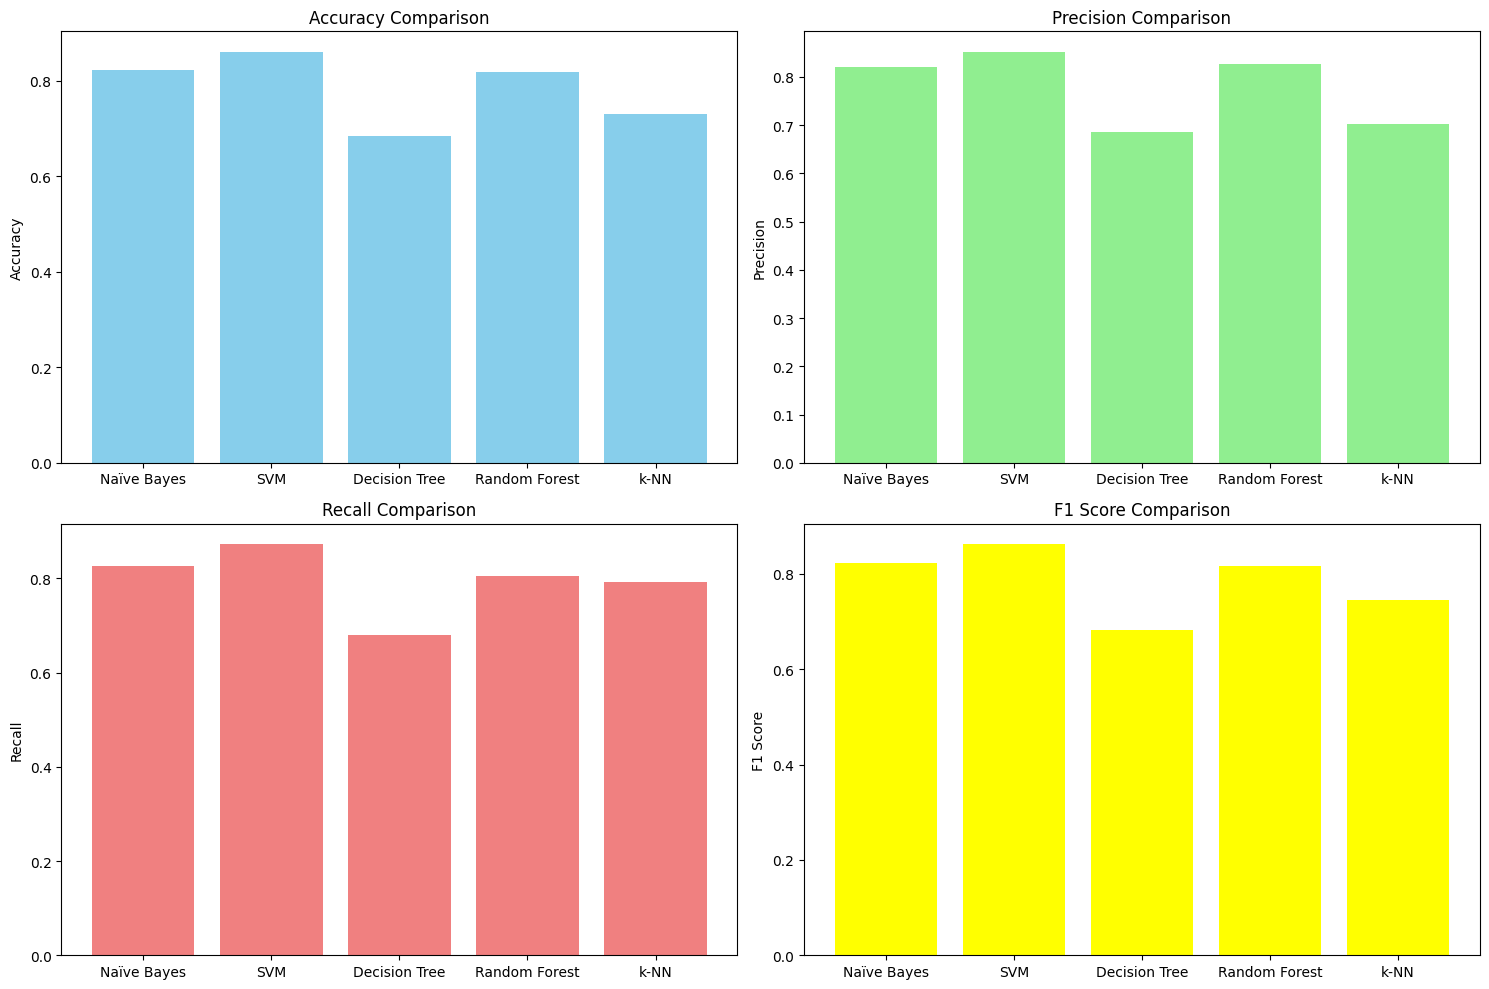

In [41]:
# Plotting the performance comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy Bar Plot
axes[0, 0].bar(results_df['model'], results_df['accuracy'], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')

# Precision Bar Plot
axes[0, 1].bar(results_df['model'], results_df['precision'], color='lightgreen')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')

# Recall Bar Plot
axes[1, 0].bar(results_df['model'], results_df['recall'], color='lightcoral')
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')

# F1 Score Bar Plot
axes[1, 1].bar(results_df['model'], results_df['f1_score'], color='yellow')
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


**Q 7: Choose an ensemble classification method (e.g., Bagging, Boosting, or Voting). Explain why you selected this ensemble method and how it can potentially improve the classification performance for the Urdu movie review dataset. (20 Marks)**
s)

In [42]:
from sklearn.ensemble import VotingClassifier

# Define individual classifiers
nb = MultinomialNB()
svm = SVC(probability=True, kernel='linear', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [43]:
# Initialize Voting Classifier with hard voting (majority rule)
voting_clf = VotingClassifier(
    estimators=[('naive_bayes', nb), ('svm', svm), ('random_forest', rf)],
    voting='hard'  # Use 'soft' if models output probabilities
)

In [45]:
# Fit the ensemble model on the training data
voting_clf.fit(x_train_tfidf, y_train)

VotingClassifier(estimators=[('naive_bayes', MultinomialNB()),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42))])

In [49]:
# Predict on the test data
y_pred_voting = voting_clf.predict(x_test_tfidf)

In [50]:
# Calculate performance metrics for the ensemble classifier
accuracy = accuracy_score(y_test, y_pred_voting)
precision = precision_score(y_test, y_pred_voting, average='weighted')
recall = recall_score(y_test, y_pred_voting, average='weighted')
f1 = f1_score(y_test, y_pred_voting, average='weighted')

In [51]:
# Display the results
print("Voting Ensemble Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Voting Ensemble Classifier Performance:
Accuracy: 0.8577
Precision: 0.8577
Recall: 0.8577
F1 Score: 0.8577


**Results Discussion**

**Comparison to Single Classifiers**

The Voting Classifier achieved an **accuracy of 85.77%** with equal precision, recall, and F1 score, meaning that all its metrics were balanced as compared to the single classifiers below:

**Naïve Bayes** had an accuracy of 82.34% and had lower recall, failing to capture some review classes effectively.
**SVM** was the best performer among the individual models with 86.08% accuracy and very high recall strength which holds good especially for high dimensional data like text.
**Random Forest** had an accuracy of **81.88%**, which showed very good performance but had a little lesser recall towards SVM.

The ensemble classifier is almost as good as SVM, and this even hints that combining Naïve Bayes and Random Forest helped balance the stability of the overall classifier, and actually brought marginally better results over using a single model alone.

**Trade-Offs and Limitations**

**Trade-Offs:** A voting classifier may render many individual classifiers stable through the averaging of biases, but potentially may be a little less accurate than the best individual classifier that it is utilizing. In this case that would be the SVM. It does yield very high accuracy, and it won't appreciably be any better than the best individual classifier that it is made from.
Limitations: Hard voting does not take into account the level of confidence one might have in a classifier's prediction, so if some model is strongly better than others, its influence would be diluted by averaging with poorer models. **Soft voting** might yield better performance if output by the classifiers is somehow probabilistic and well-calibrated. Finally, methods like voting increase computational complexity since several models should be trained and predictions aggregated.

That makes the voting classifier to provide a much stronger prediction model when it utilizes strengths from all classifiers combined and less sensitive to weaknesses in one instance. This is very valuable for complex text data, such as that of movie reviews.